In [3]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf
from scipy.constants import Boltzmann

%matplotlib widget

In [4]:

def konsentrasjon(x, D_t, x_0):
    c = 1 / 2 - 1 / 2 * erf((x - x_0) / np.sqrt(4 * D_t))
    return c

def get_t(len): # um
    flow_rate = 20 # ul/min
    flow_rate = flow_rate * 2 # to sprøyter
    flow_rate = flow_rate/60 # ul/sec
    width = 500 # um
    height = 75 # um
    vol = width * height * len # um^3
    vol = vol * 10**-9 # ul
    return vol/flow_rate

def get_size(D):
    D = D / 10**12 # convert um^2 to m^2
    T = 290 # K
    eta = 1e-3
    return Boltzmann * T / (6 * np.pi * eta * D)

def ploot(xvals, absorbance, params, D_1, fignum):
    fig, ax = plt.subplots()
    ax.plot(xvals, absorbance, label="Data")
    ax.plot(xvals, konsentrasjon(xvals, *params), label="Fit")
    ax.annotate(f"$D = {D_1:.2f} \mu m^2/s$", xy=(0.70, 0.60), xycoords="axes fraction")
    ax.set_xlabel("x position $[\mu m]$")
    ax.set_ylabel("relative concentration")
    ax.legend()
    fig.show()
    # fig.savefig(f"./strek_{fignum}.png", dpi=300)

In [5]:
from dataclasses import dataclass
from typing import Dict, List

@dataclass
class PlotData:
    xvals: np.ndarray
    absorbance: np.ndarray
    D: float
    t: float
    x_0: float
    figure_name: str


def plot_all(plot_data: List[PlotData]):
    fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
    for ax, data in zip(axs.flat, plot_data):
        ax.plot(data.xvals, data.absorbance, label="Data")
        ax.plot(data.xvals, konsentrasjon(data.xvals, data.D * data.t, data.x_0), label="Fit")
        ax.annotate(f"$D = {data.D:.2f} \mu m^2/s$", xy=(0.02, 0.90), xycoords="axes fraction")
        ax.legend()
        ax.set_title(f"{data.figure_name}")
    fig.supylabel("Relative concentration")
    fig.supxlabel("X position $[\mu m]$")
    fig.savefig("alle_streker.png", dpi=300)

In [6]:
plot_datas: Dict[int, PlotData] = {}

C:\Users\ivism\AppData\Local\Temp\ipykernel_14376\1086220313.py:2: RuntimeWarning: invalid value encountered in sqrt
  c = 1 / 2 - 1 / 2 * erf((x - x_0) / np.sqrt(4 * D_t))


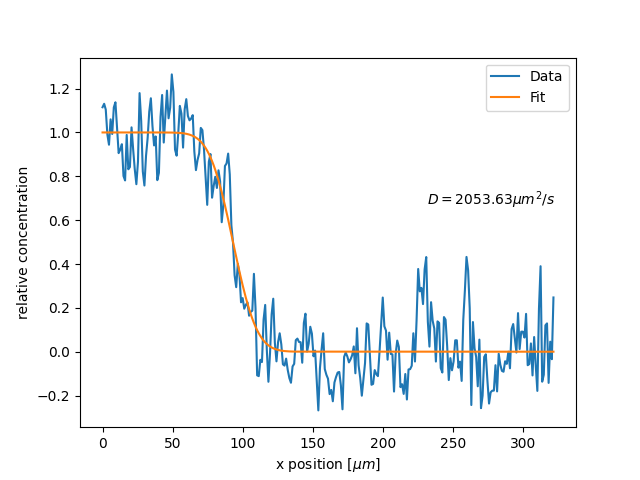

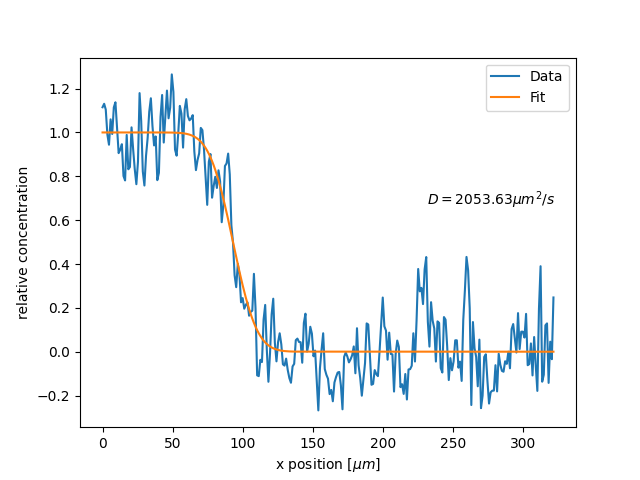

In [8]:
df = pd.read_csv("./resultater/bilde_3_strek_1_768um.csv")
xvals = np.array(df["Distance_(um)"])
intensity = np.array(df["Gray_Value"])

idxs = xvals < 330
xvals = xvals[idxs]
intensity = intensity[idxs]
idxs = xvals > 8
xvals = xvals[idxs]
intensity = intensity[idxs]

xvals = np.max(xvals) - xvals

absorbance = - np.log10(intensity)

absorbance -= np.mean(absorbance[xvals > 120])
absorbance /= np.mean(absorbance[xvals < 66])

# Her er absorbans proporsjonal med konsentrasjon, men siden absoluttverdien ikke har noe å si for den endelige D-verdien kan vi 

params, _ = curve_fit(f=konsentrasjon, xdata=xvals, ydata=absorbance)

Dt_1 = params[0]
l_1 = 768 #um

t_1 = get_t(l_1)

D1 = Dt_1/t_1 # D

ploot(xvals, absorbance, params, D1, 1)

plotdata = PlotData(
    xvals=xvals,
    absorbance=absorbance,
    D=D1,
    t=t_1,
    x_0=params[1],
    figure_name="1"
)

plot_datas[1] = plotdata

C:\Users\ivism\AppData\Local\Temp\ipykernel_19348\1086220313.py:2: RuntimeWarning: invalid value encountered in sqrt
  c = 1 / 2 - 1 / 2 * erf((x - x_0) / np.sqrt(4 * D_t))


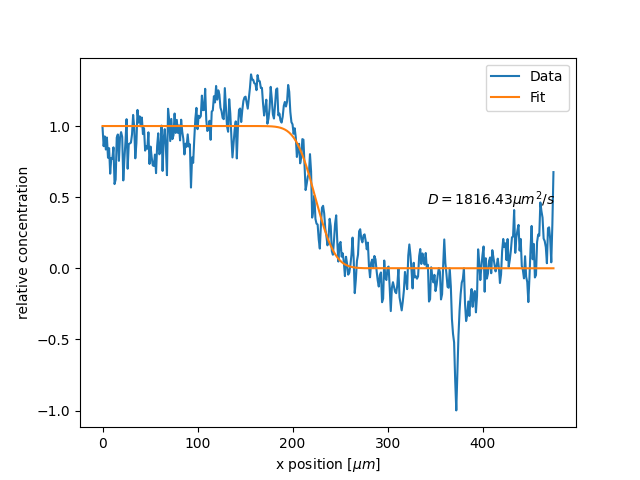

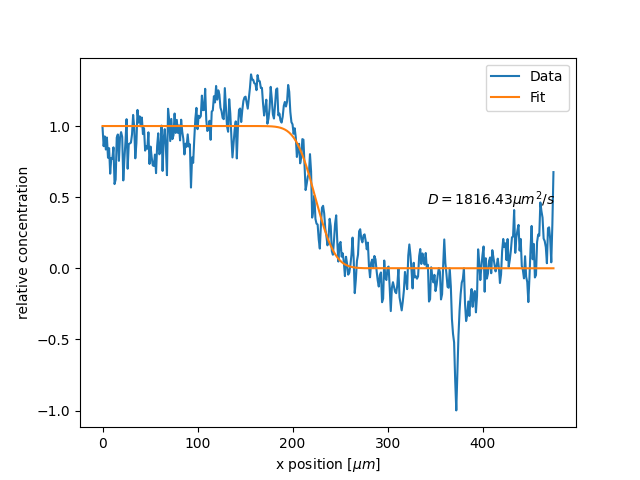

In [50]:
df = pd.read_csv("./resultater/bilde_3_strek_2_1297um.csv")
xvals = np.array(df["Distance_(um)"])
intensity = np.array(df["Gray_Value"])

absorbance = - np.log10(intensity)

absorbance -= np.mean(absorbance[xvals > 283])
absorbance /= np.mean(absorbance[xvals < 230])

# Her er absorbans proporsjonal med konsentrasjon, men siden absoluttverdien ikke har noe å si for den endelige D-verdien kan vi 

params, _ = curve_fit(f=konsentrasjon, xdata=xvals, ydata=absorbance)

Dt = params[0]
l = 1297 #um

t = get_t(l)

D2 = Dt/t # D

ploot(xvals, absorbance, params, D2, 2)

plotdata = PlotData(
    xvals=xvals,
    absorbance=absorbance,
    D=D2,
    t=t,
    x_0=params[1],
    figure_name="2"
)

plot_datas[2] = plotdata

In [34]:
df = pd.read_csv("./resultater/bilde_3_strek_3_1931um.csv")
xvals = np.array(df["Distance_(um)"])
intensity = np.array(df["Gray_Value"])

absorbance = - np.log10(intensity)

absorbance -= np.mean(absorbance[xvals > 263])
absorbance /= np.mean(absorbance[xvals < 215])

# Her er absorbans proporsjonal med konsentrasjon, men siden absoluttverdien ikke har noe å si for den endelige D-verdien kan vi 

params, _ = curve_fit(f=konsentrasjon, xdata=xvals, ydata=absorbance)

Dt = params[0]
l = 1931 # um

t = get_t(l)

D3 = Dt/t # D

# ploot(xvals, absorbance, params, D3, 3)

plotdata = PlotData(
    xvals=xvals,
    absorbance=absorbance,
    D=D3,
    t=t,
    x_0=params[1],
    figure_name="3"
)

plot_datas[3] = plotdata

In [35]:
df = pd.read_csv("./resultater/bilde_3_strek_4_2593um.csv")
xvals = np.array(df["Distance_(um)"])
intensity = np.array(df["Gray_Value"])

absorbance = - np.log10(intensity)

absorbance -= np.mean(absorbance[xvals > 260])
absorbance /= np.mean(absorbance[xvals < 200])

# Her er absorbans proporsjonal med konsentrasjon, men siden absoluttverdien ikke har noe å si for den endelige D-verdien kan vi 

params, _ = curve_fit(f=konsentrasjon, xdata=xvals, ydata=absorbance)

Dt = params[0]
l = 2593 # um

t = get_t(l)

D4 = Dt/t # D

# ploot(xvals, absorbance, params, D4, 4)

plotdata = PlotData(
    xvals=xvals,
    absorbance=absorbance,
    D=D4,
    t=t,
    x_0=params[1],
    figure_name="4"
)

plot_datas[4] = plotdata

Average diffusion coefficient: 1946.75 um^2/s
Size determined from average D: 1.09e-10 m or 0.109 nm


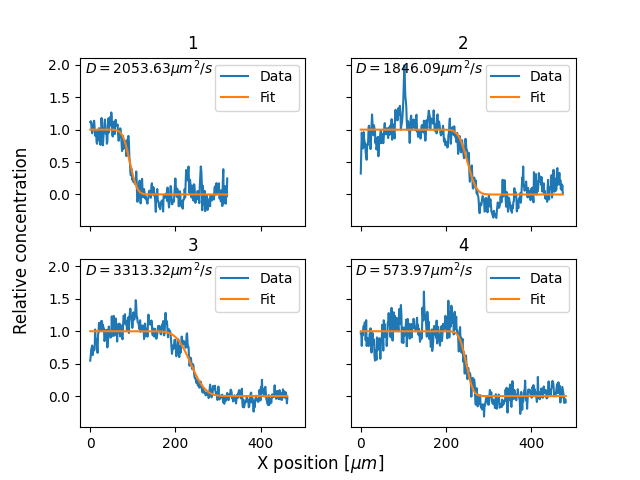

In [36]:
avg_d = np.average([D1, D2, D3, D4])
size = get_size(avg_d)
print(f"Average diffusion coefficient: {avg_d:.2f} um^2/s")
print(f"Size determined from average D: {size:.2e} m or {size*1e9:.3f} nm")

plot_all(plot_data=list(plot_datas.values()))

In [37]:
D_dev = np.std([D1, D2, D3, D4])
devperc = D_dev/avg_d
D_dev

971.287201714849

In [38]:
size_dev = devperc*size
size_dev

5.4438543709165437e-11

In [40]:
pprint([data.t for data in plot_datas.values()])
pprint([data.D for data in plot_datas.values()])


[0.04320000000000001, 0.07295625, 0.10861875000000001, 0.14585625000000002]
[2053.634554237077, 1846.0900790598882, 3313.3169883362925, 573.9669684724242]
